### NLTK를 통한 영화 리뷰 - 자연어 처리

In [2]:
from nltk.corpus import movie_reviews
from nltk.util import ngrams

#### Overview
 - NLTK에서 제공하는 영화 리뷰 corpus 문맥 분석
 - 조건부 빈도 분석
 - 조건부 확률 분석
 - 특정 단어 이후 입력되는 단어의 확률
 - 문장 적정성 평가
 - 생성된 context 확률 기반 문장 생성
 
##### Data
 - nltk.corpus 제공 dataset 'movie_reviews'

##### 1. 문맥 분석

In [4]:
sentenses = []
for tokens in movie_reviews.sents():
    bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, 
                    left_pad_symbol="SS", right_pad_symbol="SE")
    sentenses += [t for t in bigram]

sentenses[:17]

[('SS', 'plot'),
 ('plot', ':'),
 (':', 'two'),
 ('two', 'teen'),
 ('teen', 'couples'),
 ('couples', 'go'),
 ('go', 'to'),
 ('to', 'a'),
 ('a', 'church'),
 ('church', 'party'),
 ('party', ','),
 (',', 'drink'),
 ('drink', 'and'),
 ('and', 'then'),
 ('then', 'drive'),
 ('drive', '.'),
 ('.', 'SE')]

##### 2. 조건부 빈도 분석

In [5]:
from nltk import ConditionalFreqDist

cfd = ConditionalFreqDist(sentenses)

In [6]:
cfd["SS"].most_common(5)

[('the', 8071), ('.', 3173), ('it', 3136), ('i', 2471), ('but', 1814)]

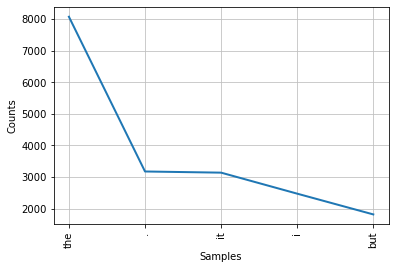

In [7]:
cfd["SS"].plot(5)
plt.show()

##### 3. 조건부 확률 분석
 - 특정 단어 이후 올 수 있는 단어의 확률 분석

In [8]:
from nltk import ConditionalProbDist, MLEProbDist
cpd = ConditionalProbDist(cfd, MLEProbDist)

##### 4. 단어 'I' 뒤에 'is'가 올 수 있는 확률
 - 0.02%로 0에 수렴한다

In [9]:
cpd["i"].prob("is")

0.0002249971875351558

##### 5. 문장 적정성 평가
 - 문장 삽입 시 적절한 문장인지 평가
 - 단어 하나하나의 확률이 매우 낮으므로 확률을 log로 변환하고, log 내 0이 입력되어 나오는 오류를 방지하기 위해 eps를 추가
     - eps : 표현할 수 있는 가장 작은 양의 실수

In [10]:
def sentence_score(s):
    p = 0.0
    for i in range(len(s)-1):
        c = s[i]
        w = s[i+1]
        p += np.log(cpd[c].prob(w)+np.finfo(float).eps)
    return np.exp(p)

In [11]:
test_sentence = ["i", "like", "the", "movie", "."]
test_sentence1 = ["i", "movie", "love", "?"]

sentence_score(test_sentence), sentence_score(test_sentence1)


(2.740764134071561e-06, 5.727877439607561e-34)

##### 6. context 생성 이후, 그 다음 나올 단어에 대한 확률로 문장 만들기

In [12]:
def generate_sentence(seed=None):
    if seed is not None:
        import random
        random.seed(seed)
    c = "SS"
    sentence = []
    while True:
        if c not in cpd:
            break
        w = cpd[c].generate()
        
        if w == "SE":
            break
        elif w in ["i", "ii", "iii"]:
            w2 = w.upper()
        elif w in ["mr", "luc", "i", "robin", "williams", "cindy", "crawford"]:
            w2 = w.title()
        else:
            w2 = w
            
        if c == "SS":
            sentence.append(w2.title())
        elif c in ["'", "\"", "("]:
            sentence.append(w2)
        elif w in ["'", ".", ",", ")", ":", ";", "?"] :
            sentence.append(w2)
        else:
            sentence.append(" "+w2)
                                    
        c = w
                                    
    return "".join(sentence)
                                    

##### 7. 문장생성

In [13]:
generate_sentence(6)

"Writers in one of the prison, yet, works as agent ray liotta, one of watching, we supposed to doubt that the holocaust - or the fact, the amc and don's wonderful experience, do what could either."

In [14]:
%%time
!wget -nc -q https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt

zsh:1: command not found: wget
CPU times: user 3.78 ms, sys: 24.6 ms, total: 28.4 ms
Wall time: 160 ms
